# WeatherPy Analysis
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

In [2]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient counts
len(cities)

614

In [4]:
cities

['yellowknife',
 'busselton',
 'yulara',
 'chapais',
 'vaini',
 'endwell',
 'prachuap khiri khan',
 'bani walid',
 'sao jose da coroa grande',
 'rikitea',
 'rio gallegos',
 'namatanai',
 'new norfolk',
 'cidreira',
 'anadyr',
 'mehamn',
 'cape town',
 'ostrovnoy',
 'tefe',
 'cherskiy',
 'jacqueville',
 'khatanga',
 'seoul',
 'hithadhoo',
 'were ilu',
 'zaachila',
 'los llanos de aridane',
 'codrington',
 'tasiilaq',
 'thompson',
 'vaitupu',
 'ushuaia',
 'blind river',
 'sentyabrskiy',
 'road town',
 'cabo san lucas',
 'pacocha',
 'agadez',
 'vardo',
 'port hardy',
 'airai',
 'grants pass',
 'bontang',
 'kutum',
 'lagoa',
 'dubbo',
 'albany',
 'dikson',
 'butaritari',
 'north bend',
 'saint-philippe',
 'bethel',
 'jomalig',
 'mataura',
 'kungurtug',
 'babra',
 'hilo',
 'rouvroy',
 'lebu',
 'port alfred',
 'kaka',
 'husavik',
 'rudbar',
 'hobart',
 'lapua',
 'xining',
 'santarem',
 'buala',
 'isangel',
 'kodiak',
 'jumla',
 'nome',
 'punta arenas',
 'avarua',
 'severo-yeniseyskiy',
 'pal

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# weather check
query = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + cities[0]
response = requests.get(query).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 62.456,
        "lon": -114.3525
    },
    "dt": 1635466684,
    "id": 6185377,
    "main": {
        "feels_like": 25.66,
        "humidity": 100,
        "pressure": 1002,
        "temp": 31.35,
        "temp_max": 32.41,
        "temp_min": 30.56
    },
    "name": "Yellowknife",
    "sys": {
        "country": "CA",
        "id": 2041581,
        "sunrise": 1635433234,
        "sunset": 1635464494,
        "type": 2
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 5.75
    }
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
city = []
country = []
lat =[]
lng = []
temp = []
temp_max = []
hum = []
cloud = []
country = []
date = []

for x in cities:    
    try:
        query = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + x
        response = requests.get(query).json()
        city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(x, "added") 

    except:
        print("Error found will skip")
    continue
        
print("END")

yellowknife added
busselton added
yulara added
chapais added
vaini added
endwell added
prachuap khiri khan added
bani walid added
sao jose da coroa grande added
rikitea added
rio gallegos added
namatanai added
new norfolk added
cidreira added
anadyr added
mehamn added
cape town added
ostrovnoy added
tefe added
cherskiy added
jacqueville added
khatanga added
seoul added
hithadhoo added
were ilu added
Error found will skip
los llanos de aridane added
codrington added
tasiilaq added
thompson added
Error found will skip
ushuaia added
blind river added
Error found will skip
road town added
cabo san lucas added
pacocha added
agadez added
vardo added
port hardy added
airai added
grants pass added
bontang added
kutum added
lagoa added
dubbo added
albany added
dikson added
butaritari added
north bend added
saint-philippe added
bethel added
Error found will skip
mataura added
kungurtug added
babra added
hilo added
rouvroy added
lebu added
port alfred added
kaka added
husavik added
rudbar added
h

sur added
barentu added
uthal added
sterling added
luanda added
ostersund added
saint-augustin added
ntungamo added
puerto escondido added
avera added
Error found will skip
umm lajj added
meulaboh added
mareeba added
laguna added
pacific grove added
paita added
chengde added
idil added
atar added
piney green added
manavalakurichi added
belaya gora added
kijang added
caceres added
ancud added
houma added
wanaka added
palauig added
adrar added
zyryanskoye added
seymchan added
busayra added
arusha added
ilebo added
breves added
geraldton added
zarya added
panjab added
aktau added
petropavlovka added
puerto carreno added
gaur added
graaff-reinet added
tura added
tam ky added
zalesovo added
vagur added
sokoni added
sao filipe added
lasa added
luleburgaz added
dezhou added
fairbanks added
koosa added
poli added
oak ridge added
arroio grande added
dunedin added
Error found will skip
yerbogachen added
santa maria added
chateaudun added
lom sak added
itamaraca added
whitehorse added
biak added


In [22]:
weather = pd.DataFrame({"City" : city, "Latitude" : lat, "Longitude" : lng, "Temperature" : temp, "Max Temperature" : temp_max, "Humidity" : hum,"Cloudiness" : cloud,"Country": country, "Date" : date})
weather

,City,Latitude,Longitude,Temperature,Max Temperature,Humidity,Cloudiness,Country,Date
0,Yellowknife,62.4560,-114.3525,31.35,32.41,100,75,CA,1635470679
1,Busselton,-33.6500,115.3333,58.05,58.05,56,24,AU,1635470890
2,Yulara,-25.2406,130.9889,76.84,76.84,16,2,AU,1635470890
3,Chapais,49.7834,-74.8492,33.58,33.58,69,0,CA,1635470891
4,Vaini,-21.2000,-175.2000,78.96,78.96,89,75,TO,1635470891
...,...,...,...,...,...,...,...,...,...
558,Almaznyy,48.0448,40.0450,42.94,42.94,88,99,RU,1635471119
559,Karratha,-20.7377,116.8463,84.61,84.61,24,6,AU,1635471119
560,‘Ewa Beach,21.3156,-158.0072,83.59,84.15,59,40,US,1635471120
561,Gigmoto,13.7796,124.3900,82.49,82.49,77,22,PH,1635471120


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Tempurature')

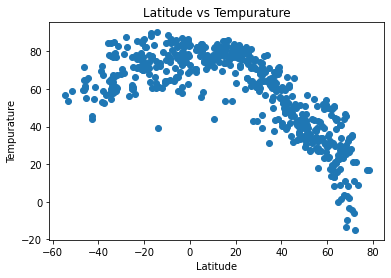

In [34]:
# x/y 
Latitude = weather['Latitude']
Temp = weather['Temperature']

plt.scatter(Latitude, Temp)

# format chart
plt.title("Latitude vs Tempurature")
plt.xlabel("Latitude")
plt.ylabel("Tempurature")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

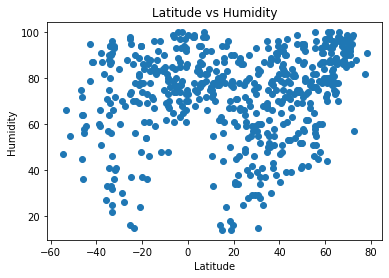

In [33]:
# x/y
Latitude = weather['Latitude']
humidity = weather['Humidity']

plt.scatter(Latitude, humidity)

# format chart
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

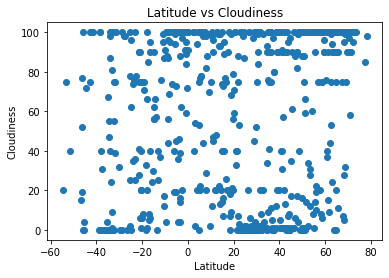

In [32]:
# x/y
Latitude = weather['Latitude']
Cloudiness = weather['Cloudiness']

plt.scatter(Latitude, Cloudiness)

# format chart
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression